In [1]:
import numpy as np
import cmath as CM
import math as M
import matplotlib.pyplot as plt

In [2]:
phase=[0, 0.5]
ampl=[122,122]
width=1280
height=1024
noise=30
meanPeriod=1024
rndPeriod=100
numOfWaves=2

In [98]:
def genImg(phase=[0, 0.5], ampl=[122,122], width=1280, height=1024, noise=10, meanPeriod=1024, rndPeriod=100, numOfWaves=2):
    meanPeriod,rndPeriod = map( lambda x: x*width if isinstance(x,float) else x, [meanPeriod, rndPeriod])
    img=np.zeros((width, height))
    K=np.zeros((numOfWaves,2))
    phi=np.zeros(numOfWaves)
    phi0=np.random.rand()*2*M.pi
    
    for i in range(numOfWaves):
        k=2*M.pi/(meanPeriod+(2*np.random.randn()-1)*rndPeriod)
        a=np.random.rand()*2*M.pi
        K[i][0]=k*M.cos(a)
        K[i][1]=k*M.sin(a)
        phi[i]=phi0+a*M.pi*phase[i]
    
    for i in range(width):
        for j in range(height):
            a=0+0j
            for k in range(numOfWaves):
                a+=ampl[k]*CM.exp(1j*(K[k][0]*i+K[k][1]*j+phi[k]))
            img[i][j]=abs(a)+noise*(1-2*np.random.randn())
            if img[i][j]>255: 
                img[i][j]=255
            elif img[i][j]<0:
                img[i][j]=0
            
    return img

def genImg_np(phase=[0, 0.5], ampl=[122,122], width=1280, height=1024, noise=10, meanPeriod=0.4, rndPeriod=0.1, numOfWaves=2):
    #meanPeriod,rndPeriod = map( lambda x: x*width if isinstance(x,float) else x, [meanPeriod, rndPeriod])
    img=np.zeros((width, height))
    K=np.zeros((numOfWaves,2))
    phi=np.zeros(numOfWaves)
    phi0=np.random.rand()*2*M.pi
    
    for i in range(numOfWaves):
        k=2*M.pi/(meanPeriod+(2*np.random.randn()-1)*rndPeriod)
        a=np.random.rand()*2*M.pi
        K[i][0]=k*M.cos(a)
        K[i][1]=k*M.sin(a)
        phi[i]=phi0+a*M.pi*phase[i]
    
    img += np.random.randn(width,height)*noise
    x = np.linspace(0,1,width)
    y = np.linspace(0,1,height)
    mesh = np.meshgrid(x, y, sparse=True)  # make sparse output arrays
    mesh = np.array(mesh)

    a = np.sum([ampl[k]*np.exp(1j*(np.dot(K[k],mesh)+phi[k])) for k in range(numOfWaves)],axis=0)
    #print(a.shape,img.shape)
    img +=np.real(a).T

    #map(assign_amp,img)
            
    return img


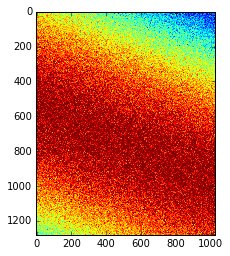

In [94]:
plt.imshow(genImg().astype(np.uint8), interpolation='nearest')
plt.show()

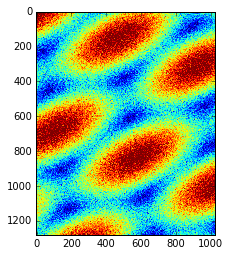

CPU times: user 11.2 s, sys: 293 ms, total: 11.5 s
Wall time: 11.1 s


In [95]:
%%time 
plt.imshow(genImg(meanPeriod=0.6,rndPeriod=0.2, numOfWaves=3, phase=[0, 0, 0], ampl=[85,85,85]).astype(np.uint8), interpolation='nearest')
plt.show()

In [96]:
%%time
i = genImg_np(meanPeriod=0.8)

(1024, 1280) (1280, 1024)
CPU times: user 379 ms, sys: 88 ms, total: 467 ms
Wall time: 403 ms


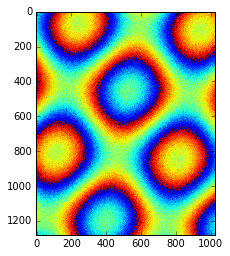

In [97]:
plt.imshow(i.astype(np.int8))